In [7]:
import sys
import time
import numpy as np
from autokiddobot import AutoKiddobot

This code works with the vrep model 'kiddobot_dynamixel_real_v2.ttt'
<img src='kiddobot_ws.png' width=40%>

<b>AutoKiddobot class</b><br>
Variables:
    * x,y  : last pen coordinate. set by the get_current_xy() function. 
    * xmax, ymax  : range in x axis and y axis. Fixed value. 
Functions: 
    * start: connect with VREP and start simulation. Make sure the model is loaded in VREP beforehand.
    * get_current_xy()  : read pen position. returns (x,y)
    * go_to_xy(x, y)  : move pen position to (x,y) position.
    * pen_down() : as it said.
    * pen_up() : as it said.
    * close() : close simulation in VREP.

### Lets start.

In [8]:
bot=AutoKiddobot()
bot.start()

Kiddobot sim and kin auto
Kiddobot class
2D Kin. version= March, 9, 2020
Link1= 200 mm  Link2= 180 mm
max xy= 300 200
vrep simulated robot, version= March, 9, 2020
Failed connecting to remote API server


In [9]:
print('last pen position:', bot.x, bot.y)
print('x,y max range:', bot.xmax, bot.ymax)

last pen position: 0 0
x,y max range: 300 200


# Circle

In [10]:
import math
import matplotlib.pyplot as plt

In [11]:
r=100
x,y,p=[0],[r],[]
pk=1-r
p.append(pk)
#print(x,y,p)

In [12]:
x1,y1=x[0],y[0]
while (x1<y1):
    if pk<0:
        pk=pk+2*x1+3
        x1+=1
    else:
        pk=pk+2*(x1-y1)+5
        y1-=1
        x1+=1
    x.append(x1)
    y.append(y1)
    p.append(pk)
#print(x,y)

In [13]:
xx1=[]
yy1=[]

#First Quadrent
p1=len(x)-1
for i in range(p1):
    x.append(y[p1-i])
    y.append(x[p1-i])
    xx1.append(y[p1-i])
    yy1.append(x[p1-i])
x.append(y[0])
y.append(x[0])
xx1.append(y[0])
yy1.append(x[0])

#Second, Third, Fourth Quadrent
x2,x3,x4,y2,y3,y4=[],[],[],[],[],[]
p1,d=len(x),len(xx1)
for i in range(p1):
    x2.append(x[i]*-1)
    x4.append(x[i])
    y2.append(y[i])
    y4.append(y[i]*-1)
    
for i in range(d):
    x3.append(xx1[d-i-1]*-1)
    y3.append(yy1[d-i-1]*-1)    
for i in range(d):
    x3.append(x[d-i-1]*-1)
    y3.append(y[d-i-1]*-1)

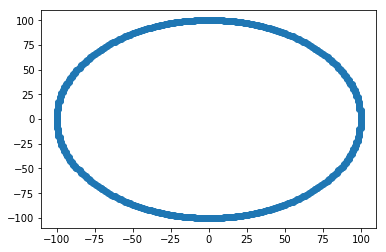

In [14]:
for i in range(p1):
    x.append(x4[p1-i-1])
    y.append(y4[p1-i-1])
for i in range(p1):
    x.append(x3[p1-i-1])
    y.append(y3[p1-i-1])
for i in range(p1):
    x.append(x2[p1-i-1])
    y.append(y2[p1-i-1])
#print(x,y)
plt.scatter(x,y)
plt.plot(x,y)

In [15]:
xx1,yy1=[],[]
for i in range(len(x)):
    xx1.append(x[i]+100)
    yy1.append(y[i]+100)

In [16]:
bot.go_to_xy(100,200)
bot.pen_down()

pen down to do


In [17]:
for i in range(len(xx1)):
    bot.go_to_xy(xx1[i],yy1[i])

In [18]:
bot.pen_up()

pen up to do


This code draw Circle with the vrep model 'kiddobot_dynamixel_real_v2.ttt' 
<img src='Circle.png' width=40%>

In [19]:
bot.close()

connection closed...
